/var/folders/gw/rdd16gz922j8hc9s9c737lpw0000gr/T/ipykernel_39333/4186767014.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_sample, cmap=plt.cm.get_cmap("jet", 10), s=0.1)


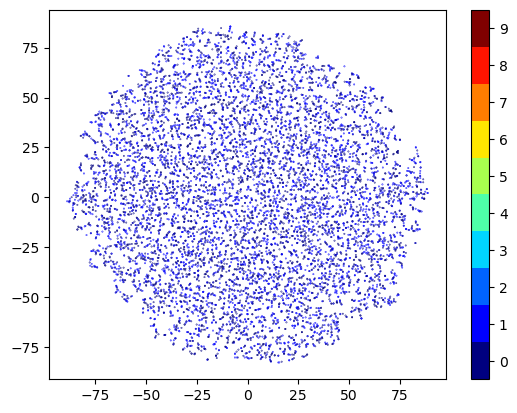

In [9]:
#sample from np.array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

X = np.random.rand(1000000, 10)
y = np.random.rand(1000000, 1)

#sample 10000 from X, y
indexes = np.random.choice(X.shape[0], 10000, replace=False)
X_sample = X[indexes]
y_sample = y[indexes]

#Tsne on the samples
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_sample)

#plot the samples
#small point size
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_sample, cmap=plt.cm.get_cmap("jet", 10), s=0.1)
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()


In [8]:
from sklearn.manifold import TSNE, Isomap
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pynndescent
from pynndescent import PyNNDescentTransformer

pynnd_tsne = make_pipeline(
    PyNNDescentTransformer(n_neighbors=92),
    TSNE(metric="precomputed", random_state=42, init="random"),
)
X = np.random.rand(100000, 10)
y = np.random.rand(100000, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_trans = pynnd_tsne.fit_transform(X)

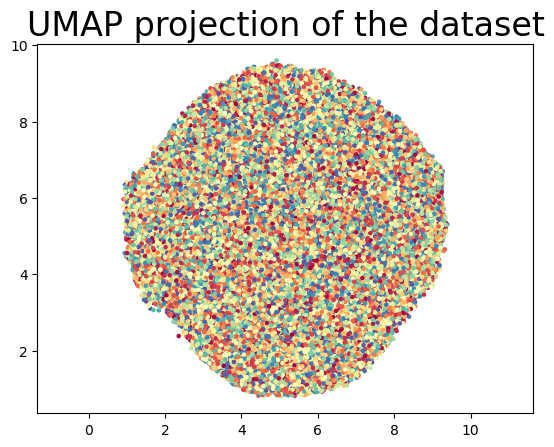

In [3]:
#umap
import umap
import matplotlib.pyplot as plt
import numpy as np

#use umap to reduce the dimensionality of the data
reducer = umap.UMAP(random_state=42)
X = np.random.rand(100000, 10)
y = np.random.rand(100000, 1)
embedding = reducer.fit_transform(X)

#plot the reduced data
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')    
plt.title('UMAP projection of the dataset', fontsize=24);


In [9]:
import torch

x = torch.rand(5, 3)
#random sample rows from x, random_state = 42
#set random_state
torch.manual_seed(42)
x = x[torch.randperm(x.size()[0])[:2]]
print(x)

tensor([[0.9346, 0.5936, 0.8694],
        [0.8854, 0.5739, 0.2666]])
